In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
import sklearn.neighbors as knn

In [3]:
# repeatable seed
random_state = 2**12
np.random.seed(seed=random_state)

In [4]:
# an AND gate has 4 possible outcomes: 0^0=0, 0^1=0, 1^0=0, 1^1=1
# Since the state can only be 0 or 1, I propolate the sample with Logistic Distribution
n = 1000
mean, scale = 0.5, 0.15
x1 = np.random.logistic(mean, scale, n)
x2 = np.random.logistic(mean, scale, n)
x = np.column_stack((x1, x2))

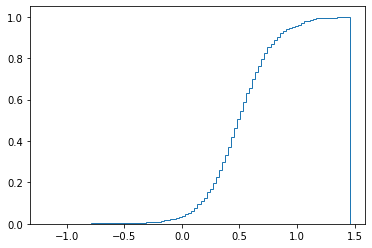

In [5]:
bins=100
plt.figure()
plt.hist(x1, bins, density=True, histtype='step', cumulative=True, label='CDF')
plt.show()

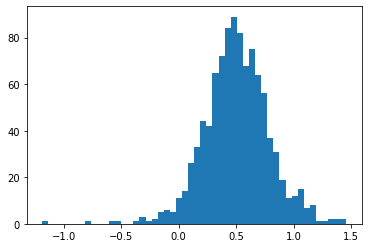

In [6]:
plt.figure()
count, bins, ignored = plt.hist(x1, bins=50)
plt.show()

In [7]:
y = np.array([1 if x_i[0] >= 0.5 and x_i[1] >= 0.5 else 0 for x_i in x])

In [8]:
# around 25% of points are output 1
print(y[y==1].size/n)

0.257


In [9]:
figsize = np.array(plt.rcParams["figure.figsize"]) * 2

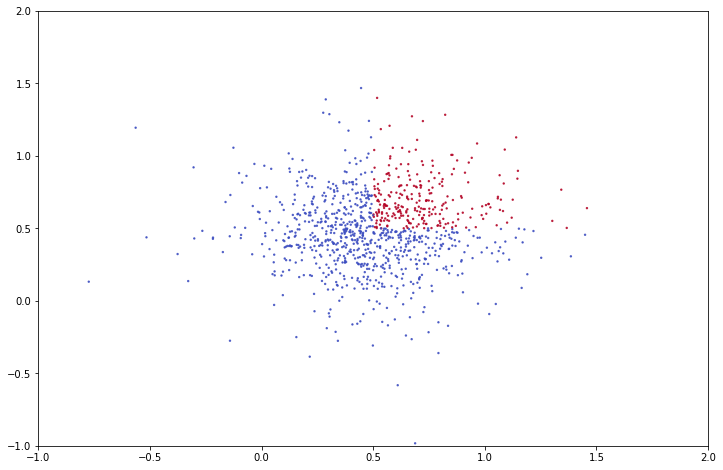

In [10]:
x_min, x_max = -1.0, 2

plt.figure(figsize=figsize.tolist())
plt.scatter(x[:, 0], x[:, 1], marker='.', c=y, alpha=0.8, cmap=plt.cm.coolwarm, s=8, edgecolor='face')
plt.grid(False)
plt.xlim(x_min, x_max)
plt.ylim(x_min, x_max)
plt.show()

In [11]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.20)

In [12]:
# SVM
gamma = 10.0
C = 1000
model = svm.SVC(kernel='rbf', decision_function_shape='ovo', random_state=random_state, gamma=gamma, C=C)
model.fit(x_train, y_train)

SVC(C=1000, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovo', degree=3, gamma=10.0, kernel='rbf',
    max_iter=-1, probability=False, random_state=4096, shrinking=True,
    tol=0.001, verbose=False)

In [13]:
print(f'With gamma={gamma} and C={C}')

y_pred = model.predict(x_train)
score = accuracy_score(y_train, y_pred)
print(f'Accuracy on train set = {score*100:.3f}%')

y_pred = model.predict(x_test)
score = accuracy_score(y_test, y_pred)
print(f'Accuracy on test set = {score*100:.3f}%')

With gamma=10.0 and C=1000
Accuracy on train set = 99.250%
Accuracy on test set = 97.500%


In [14]:
print(model.predict([[1., 1.]]))
print(model.predict([[1., 0.]]))
print(model.predict([[0., 1.]]))
print(model.predict([[0., 0.]]))

[1]
[0]
[0]
[0]


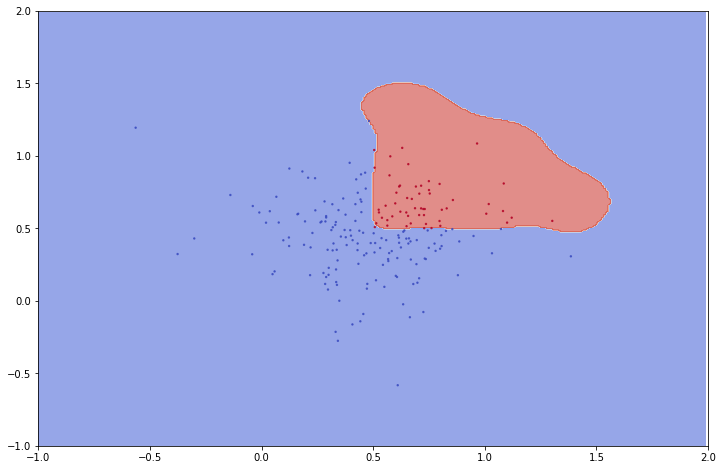

In [15]:
h = .01
# by symmetry x and y axis should be in same range
# x_min, x_max = x_test[:, 0].min() - 1, x_test[:, 0].max() + 1
x_min, x_max = -1.0, 2

xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(x_min, x_max, h))
Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.figure(figsize=figsize.tolist())
plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.6)
plt.scatter(x_test[:, 0], x_test[:, 1], c=y_test, marker='.', alpha=0.8, cmap=plt.cm.coolwarm, s=8, edgecolor='face')
plt.xlim(x_min, x_max)
plt.ylim(x_min, x_max)
plt.show()

In [16]:
def print_adversarial_examples(model):
    print(f'0.53^1.42={model.predict([[.53, 1.42]])[0]}')
    print(f'0.54^1.42={model.predict([[.54, 1.42]])[0]}')
    print(f'0.54^1.43={model.predict([[.54, 1.43]])[0]}\n')

    print(f'0.53^1.43={model.predict([[.53, 1.43]])[0]}')
    print(f'0.52^1.43={model.predict([[.52, 1.43]])[0]}\n')

    print(f'0.5^0.499={model.predict([[.5, .499]])[0]}')
    print(f'0.501^0.51={model.predict([[.501, .51]])[0]}')

In [17]:
print_adversarial_examples(model)

0.53^1.42=1
0.54^1.42=1
0.54^1.43=1

0.53^1.43=1
0.52^1.43=1

0.5^0.499=0
0.501^0.51=0


In [18]:
model.get_params()

{'C': 1000,
 'cache_size': 200,
 'class_weight': None,
 'coef0': 0.0,
 'decision_function_shape': 'ovo',
 'degree': 3,
 'gamma': 10.0,
 'kernel': 'rbf',
 'max_iter': -1,
 'probability': False,
 'random_state': 4096,
 'shrinking': True,
 'tol': 0.001,
 'verbose': False}

In [19]:
# all positive samples
x_pos = x_train[np.where(y_train == 1)]
x_pos_max = np.amax(x_pos, axis=0)
x_pos_min = np.amin(x_pos, axis=0)
print('positive range:', x_pos_max, x_pos_min)

# all negative samples
x_neg = x_train[np.where(y_train == 0)]
x_neg_max = np.amax(x_neg, axis=0)
x_neg_min = np.amin(x_neg, axis=0)
print('negative range:', x_neg_max, x_neg_min)

positive range: [1.45741672 1.40002104] [0.50129142 0.50056651]
negative range: [1.44901657 1.46800519] [-0.77457847 -0.9828633 ]


In [20]:
# Testing inputs
test_x = np.array([
    # standard
    [1.000, 1.000],  # 1
    [1.000, 0.000],  # 0
    [0.000, 1.000],  # 0
    [0.000, 0.000],  # 0
    # top centre
    [0.530, 1.430],  # 1
    [0.520, 1.430],  # 1
    [0.490, 1.430],  # 0
    [0.490, 1.450],  # 0
    # centre
    [0.502, 0.499],  # 0
    [0.502, 0.501],  # 1
    [0.502, 0.510],  # 1
    [0.499, 0.499],  # 0
    # out of training range
    # positive
    [0.5001, 1.200], # 1
    [1.200, 0.5001], # 1
    [0.510, 1.420],  # 1
    [1.470, 0.510],  # 1
    # negative
    [-0.990, 0.999], # 0
    [0.999, -0.780], # 0
    [1.460, 0.000],  # 0
    [0.000, 1.480]   # 0
])

test_y = np.array([1,0,0,0, 1,1,0,0, 0,1,1,0, 1,1,1,1, 0,0,0,0])
print(len(test_x))
print(len(test_y))

20
20


In [21]:
pred = model.predict(test_x)
print(pred)

[1 0 0 0 1 1 1 0 0 0 0 0 1 0 1 1 0 0 0 0]


In [22]:
# get indices for misclassified samples
ind_mis = np.where(np.logical_xor(test_y, pred) == True)
print(ind_mis)
print('\nMisclassified samples:\n', test_x[ind_mis])
print('\nTrue class:\n', test_y[ind_mis])
print('\nPredictions:\n', pred[ind_mis])

(array([ 6,  9, 10, 13]),)

Misclassified samples:
 [[0.49   1.43  ]
 [0.502  0.501 ]
 [0.502  0.51  ]
 [1.2    0.5001]]

True class:
 [0 1 1 1]

Predictions:
 [1 0 0 0]


In [23]:
# knn
# the reliability domain uses in-class neighbours, thus we trian 1 model for each class.
k = 9
model_knn = knn.KNeighborsClassifier(
    n_neighbors=k, 
    n_jobs=-1,
    weights='distance',
    algorithm='ball_tree'
)
model_knn.fit(x_train, y_train)

KNeighborsClassifier(algorithm='ball_tree', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=9, p=2,
                     weights='distance')

In [24]:
pred_knn = model_knn.predict(test_x)

In [25]:
# get indices for misclassified samples
ind_mis = np.where(np.logical_xor(pred_knn, pred) == True)
print(ind_mis)
print('\nMisclassified samples:\n', test_x[ind_mis])
print('\nTrue class:\n', test_y[ind_mis])
print('\nPredictions:\n', pred_knn[ind_mis])

(array([15]),)

Misclassified samples:
 [[1.47 0.51]]

True class:
 [1]

Predictions:
 [0]


In [26]:
# pick a point which closes to the centre
print('Sample:', test_x[8])
neigh_dist, neigh_indices = model_knn.kneighbors([test_x[8]], n_neighbors=k)
print('\nMean distance:\n', np.average(neigh_dist[0]))
print('\nIndices in training set:\n', neigh_indices[0])
print('\nTraining samples"\n',x_train[neigh_indices[0]])
print('\nGround truth:\n',y_train[neigh_indices[0]])

Sample: [0.502 0.499]

Average distance:
 0.024046108390979735

Indices in training set:
 [554 467 695 732 429 747 166 111 776]

Training samples"
 [[0.51542099 0.50205401]
 [0.4979466  0.51427598]
 [0.5150806  0.51052241]
 [0.48760981 0.51423512]
 [0.50130125 0.47384295]
 [0.48084587 0.51314113]
 [0.47122374 0.50471827]
 [0.53432821 0.4996976 ]
 [0.53616138 0.50076245]]

Ground truth:
 [1 0 1 0 0 0 0 0 1]


In [27]:
# computer the average distance for each class in training set
x_train_pos = x_train[np.where(y_train==1)]
x_train_neg = x_train[np.where(y_train==0)]

In [42]:
# these models contains only 1 class. The prediction should NOT be used.
model_knn_pos = knn.KNeighborsClassifier(n_neighbors=k, n_jobs=-1)
train_pos_ind = np.where(y_train==1)
model_knn_pos.fit(x_train[train_pos_ind], y_train[train_pos_ind])
train_pos_dis, _ = model_knn_pos.kneighbors(x_train_pos, n_neighbors=k+1)
avg_pos_dis = np.sum(train_pos_dis, axis=1) / (k + .0)
mu_pos_dis = np.mean(avg_pos_dis)
sd_pos_dis = np.std(avg_pos_dis)
print('Distance of training samples in positive class:')
print('{:18s} = {}'.format('Mean', mu_pos_dis))
print('{:18s} = {}\n'.format('Standard deviation', sd_pos_dis))

model_knn_neg = knn.KNeighborsClassifier(n_neighbors=k, n_jobs=-1)
train_neg_ind = np.where(y_train==0)
model_knn_neg.fit(x_train[train_neg_ind], y_train[train_neg_ind])
train_neg_dis, _ = model_knn_neg.kneighbors(x_train_neg, n_neighbors=k+1)
avg_neg_dis = np.sum(train_neg_dis, axis=1) / (k + .0)
mu_neg_dis = np.mean(avg_neg_dis)
sd_neg_dis = np.std(avg_neg_dis)
print('Distance of training samples in negative class:')
print('{:18s} = {}'.format('Mean', mu_neg_dis))
print('{:18s} = {}'.format('Standard deviation', sd_neg_dis))

Distance of training samples in positive class:
Mean               = 0.05913833188050649
Standard deviation = 0.050790405724772086

Distance of training samples in negative class:
Mean               = 0.056980135272015967
Standard deviation = 0.060823106436199904


In [62]:
# parameter for proportion
# 95%
zeta = 1.959
pos_dist_threshold = mu_pos_dis + zeta * sd_pos_dis
neg_dist_threshold = mu_pos_dis + zeta * sd_neg_dis
print(f'Positive distance threshold = {pos_dist_threshold}')
print(f'Negative distance threshold = {neg_dist_threshold}')

Positive distance threshold = 0.158636736695335
Negative distance threshold = 0.1782907973890221


In [50]:
# pseudo reliability check
# test_x: hand picked samples which contain adversarial examples; They are NOT from test set
# pred: labels which are predicted by the model (SVM)
test_pos_ind = np.where(pred==1)
test_neg_ind = np.where(pred==0)

In [ ]:
# positive class
pos_neigh_dist, pos_neigh_ind = model_knn_pos.kneighbors(test_x[test_pos_ind], n_neighbors=k, return_distance=True)

In [61]:
mu_test_pos_dist = np.mean(pos_neigh_dist, axis=1)
print('Positive test set')
print('Mean distance:')
print(*mu_test_pos_dist, sep='\n')
pos_dist_within = np.where(mu_test_pos_dist <= pos_dist_threshold)
print('\nWithin threshold:')
print(*test_x[test_pos_ind][pos_dist_within])
print(f'Pass rate = {len(test_x[test_pos_ind][pos_dist_within]) / len(test_x[test_pos_ind]) * 100.0:.3f}%')

Positive test set
Mean distance:
0.12542141528021145
0.2747920490419846
0.278500696802819
0.29281617618937095
0.17499213491484897
0.2745522904019554
0.34530021749447193

Within threshold:
[1. 1.]
Pass rate = 14.286%


In [55]:
# positive class
neg_neigh_dist, neg_neigh_ind = model_knn_neg.kneighbors(test_x[test_neg_ind], n_neighbors=k, return_distance=True)

In [63]:
mu_test_neg_dist = np.mean(neg_neigh_dist, axis=1)
print('Negative test set')
print('Mean distance:')
print(*mu_test_neg_dist, sep='\n')
neg_dist_within = np.where(mu_test_neg_dist <= neg_dist_threshold)
print('\nWithin threshold:')
print(*test_x[test_neg_ind][neg_dist_within])
print(f'Pass rate = {len(test_x[test_neg_ind][neg_dist_within]) / len(test_x[test_neg_ind]) * 100.0:.3f}%')

Negative test set
Mean distance:
0.15884151132289057
0.12340764593015059
0.1929676535511486
0.2785843842406608
0.030096113696449586
0.030188975545028845
0.031381108187291146
0.029643712365169057
0.11163901993556372
0.8565402627600801
0.5982499957685424
0.41588712177619874
0.4221394218693345

Within threshold:
[1. 0.] [0. 1.] [0.502 0.499] [0.502 0.501] [0.502 0.51 ] [0.499 0.499] [1.2    0.5001]
Pass rate = 53.846%
